<a href="https://colab.research.google.com/github/sameera-shaik123/SCT_DS_4/blob/main/Traffic_Accidents_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
uploaded=files.upload()

Saving cleaned_us_accidents_100rows.csv to cleaned_us_accidents_100rows.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start_Time         100 non-null    object 
 1   Hour               100 non-null    int64  
 2   DayOfWeek          100 non-null    object 
 3   Weather_Condition  100 non-null    object 
 4   Junction           100 non-null    bool   
 5   Traffic_Signal     100 non-null    bool   
 6   Severity           100 non-null    int64  
 7   Start_Lat          100 non-null    float64
 8   Start_Lng          100 non-null    float64
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 5.8+ KB


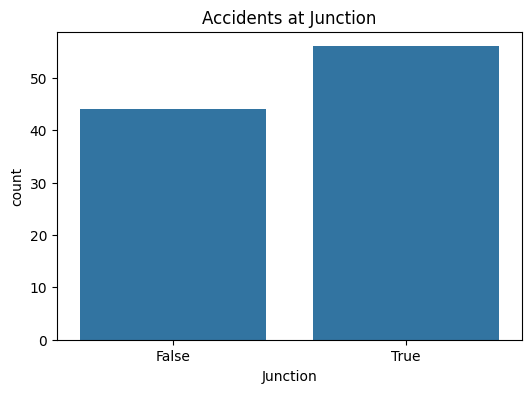

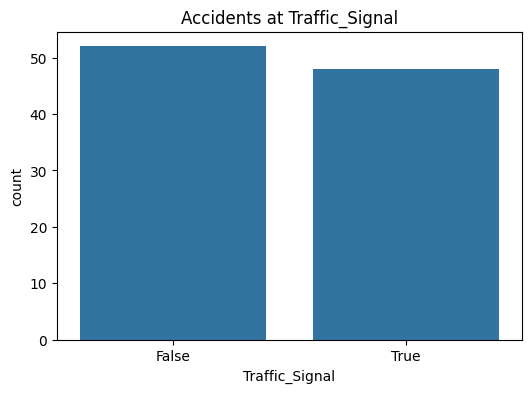

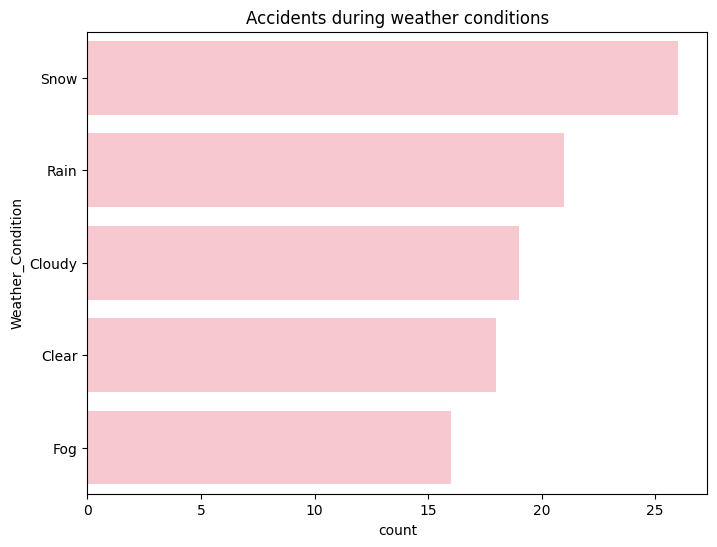

<ipython-input-53-1c3ccef1873d>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Hour',palette='pastel')


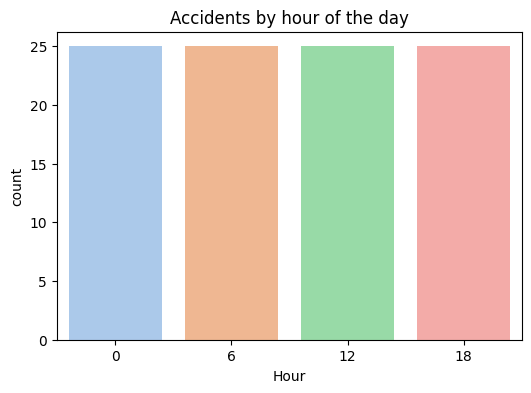

<ipython-input-53-1c3ccef1873d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='DayOfWeek',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='Set2')


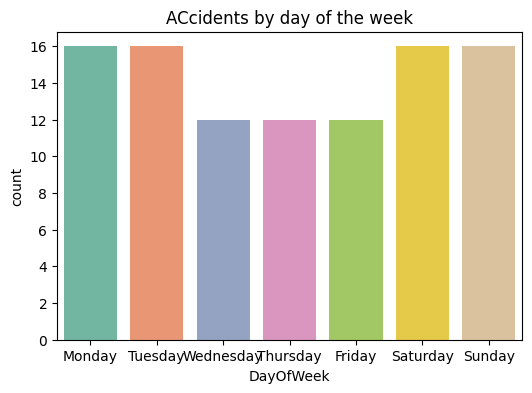

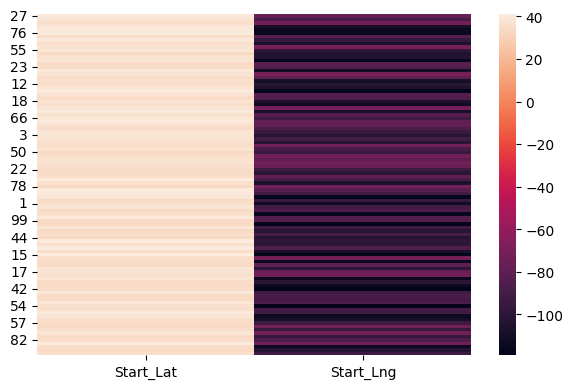

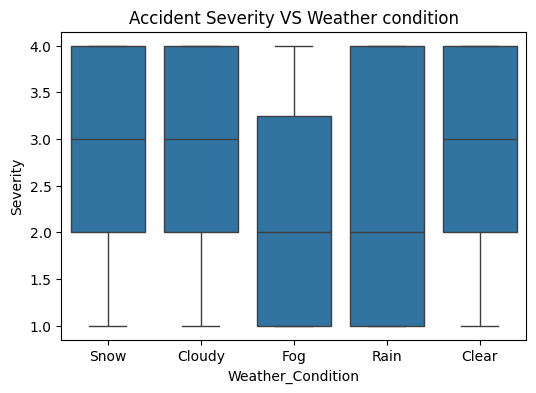

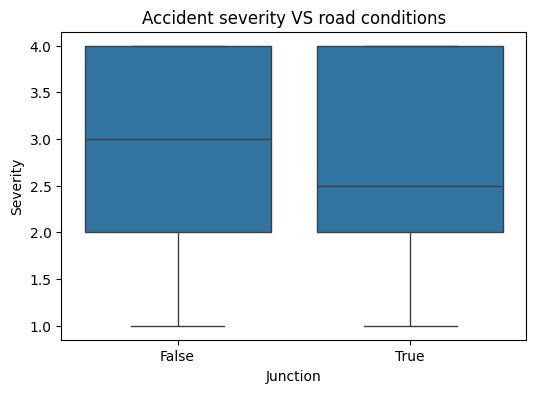

In [53]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#reading the dataset
df=pd.read_csv('cleaned_us_accidents_100rows.csv')
df.head()
df.info()
df.describe()
#checking for null values
df.isnull().sum()
df['Start_Time']=pd.to_datetime(df['Start_Time'])
#road conditions features
#checking for the features like junction,traffic signal increase accident risks
road_features=['Junction','Traffic_Signal']
for feature in road_features:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df,x=feature)
  plt.title(f'Accidents at {feature}')
  plt.show()
#weather conditions
top_weather=df['Weather_Condition'].value_counts(normalize=True).head(10).index
plt.figure(figsize=(8,6))
sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)],y='Weather_Condition',order=top_weather,color='pink')
plt.title('Accidents during weather conditions')
plt.show()
#time of day analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Hour',palette='pastel')
plt.title('Accidents by hour of the day')
plt.show()
#day of week
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='DayOfWeek',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],palette='Set2')
plt.title('ACcidents by day of the week')
plt.show()
#visualization of hotspots
import folium
from folium.plugins import HeatMap
sample_df=df[['Start_Lat','Start_Lng']].dropna().sample(100)
m=folium.Map(location=[sample_df['Start_Lat'].mean(),sample_df['Start_Lng'].mean()],zoom_start=6)
plt.figure(figsize=(6,4))
sns.heatmap(sample_df)
plt.tight_layout()
#Accident Severity Vs weather conditions
plt.figure(figsize=(6,4))
sns.boxplot(data=df[df['Weather_Condition'].isin(top_weather)],x='Weather_Condition',y='Severity')
plt.title('Accident Severity VS Weather condition')
plt.show()
#Acident severity vs road conditions
plt.figure(figsize=(6,4))
sns.boxplot(x='Junction',y='Severity',data=df)
plt.title('Accident severity VS road conditions')
plt.show()
